In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

from matplotlib import style
style.use('seaborn')
%matplotlib inline


In [ ]:
#from google.colab import drive
#/drive.mount('/content/gdrive')

#import pandas as pd

data1 = pd.read_csv('public_150k_plus_220403.csv')
data2 = pd.read_csv('public_up_to_150k_1_220403.csv')
data3 = pd.read_csv('public_up_to_150k_2_220403.csv')
data4 = pd.read_csv('public_up_to_150k_3_220403.csv')
data5 = pd.read_csv('public_up_to_150k_4_220403.csv')
data6 = pd.read_csv('public_up_to_150k_5_220403.csv')
data7 = pd.read_csv('public_up_to_150k_6_220403.csv')
data8 = pd.read_csv('public_up_to_150k_7_220403.csv')
data9 = pd.read_csv('public_up_to_150k_8_220403.csv')
data10 = pd.read_csv('public_up_to_150k_9_220403.csv')
data11 = pd.read_csv('public_up_to_150k_10_220403.csv')
data12 = pd.read_csv('public_up_to_150k_11_220403.csv')

fullData = [data2, data3, data4, data5, data6, data7, data8,data9, data10, data12]

fData = pd.concat(fullData)

fData


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150557,7405357310,04/30/2020,610.0,PPP,"MANAKAMANA GRILL, INC.",4270 SAINT MICHAEL DR,TEXARKANA,TX,75503-2573,04/13/2021,...,Corporation,71476.0,"Guaranty Bank & Trust, National Association",MOUNT PLEASANT,TX,Unanswered,Unanswered,NaN,28543.69,03/17/2021
150558,7416997102,04/14/2020,681.0,PPP,"AUSTIN RIVERSIDE - DR, PLLC",2015 E RIVERSIDE DR Ste C & D,AUSTIN,TX,78741-1338,05/12/2021,...,Corporation,68987.0,Independent Bank,MCKINNEY,TX,Male Owned,Non-Veteran,NaN,28586.93,04/28/2021
150559,7612647001,04/07/2020,681.0,PPP,"DASH POINT SOFTWARE, INC",4008 Avery Woods Lane,CEDAR PARK,TX,78613-7674,11/06/2020,...,Subchapter S Corporation,106661.0,University FCU,AUSTIN,TX,Unanswered,Unanswered,NaN,28438.36,10/08/2020
150560,7739708609,03/24/2021,678.0,PPP,KENT KURKLIN,18117 N FM 400,Petersburg,TX,79250-2814,07/17/2021,...,Sole Proprietorship,68921.0,The First State Bank,ABERNATHY,TX,Unanswered,Unanswered,NaN,28370.75,06/23/2021


In [ ]:
fData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546074 entries, 0 to 150561
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   LoanNumber                   1546074 non-null  int64  
 1   DateApproved                 1546074 non-null  object 
 2   SBAOfficeCode                1546051 non-null  float64
 3   ProcessingMethod             1546074 non-null  object 
 4   BorrowerName                 1546068 non-null  object 
 5   BorrowerAddress              1545933 non-null  object 
 6   BorrowerCity                 1545932 non-null  object 
 7   BorrowerState                1545926 non-null  object 
 8   BorrowerZip                  1545937 non-null  object 
 9   LoanStatusDate               1297470 non-null  object 
 10  LoanStatus                   1546072 non-null  object 
 11  Term                         1546072 non-null  float64
 12  SBAGuarantyPercentage        1546071 non-nu

In [ ]:
test = fData.copy()


In [ ]:

li = ['UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED']
sub1 = test[li]

sub2 = sub1.fillna(0)

sub2['TOTAL_PROCEEDS'] = sub2['UTILITIES_PROCEED'] + sub2['PAYROLL_PROCEED'] + sub2['MORTGAGE_INTEREST_PROCEED'] + sub2['RENT_PROCEED'] + sub2['REFINANCE_EIDL_PROCEED'] + sub2['HEALTH_CARE_PROCEED'] + sub2['DEBT_INTEREST_PROCEED']

li2 = ['TOTAL_PROCEEDS', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED']
sub3 = sub2[li2]

sub3

,TOTAL_PROCEEDS,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED
0,149358.60,1.0,149357.60,0.0,0.0,0.0,0.0,0.0
1,148440.00,0.0,148440.00,0.0,0.0,0.0,0.0,0.0
2,140081.78,0.0,140081.78,0.0,0.0,0.0,0.0,0.0
3,136520.96,0.0,136520.96,0.0,0.0,0.0,0.0,0.0
4,130600.00,0.0,130600.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
150557,28300.00,0.0,28300.00,0.0,0.0,0.0,0.0,0.0
150558,28300.00,0.0,28300.00,0.0,0.0,0.0,0.0,0.0
150559,28300.00,0.0,28300.00,0.0,0.0,0.0,0.0,0.0
150560,28295.00,1.0,28294.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
test['TOTAL_PROCEEDS'] = sub3['TOTAL_PROCEEDS']

li3 = ['TOTAL_PROCEEDS', 'ForgivenessAmount','JobsReported', 'RuralUrbanIndicator']

fullSubset = test[li3]

fullSubset

,TOTAL_PROCEEDS,ForgivenessAmount,JobsReported,RuralUrbanIndicator
0,149358.60,150775.38,15.0,U
1,148440.00,150083.01,12.0,U
2,140081.78,141920.11,3.0,U
3,136520.96,137747.78,170.0,U
4,130600.00,131876.98,14.0,U
...,...,...,...,...
150557,28300.00,28543.69,10.0,R
150558,28300.00,28586.93,10.0,U
150559,28300.00,28438.36,2.0,U
150560,28295.00,28370.75,3.0,R


In [ ]:
fullSubset.isnull().sum()

TOTAL_PROCEEDS              0
ForgivenessAmount      201414
JobsReported                8
RuralUrbanIndicator         4
dtype: int64

In [ ]:
fullSubset.dropna(how='any', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
fullSubset.isnull().sum()

TOTAL_PROCEEDS         0
ForgivenessAmount      0
JobsReported           0
RuralUrbanIndicator    0
dtype: int64

In [ ]:
fullSubset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344660 entries, 0 to 150560
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TOTAL_PROCEEDS       1344660 non-null  float64
 1   ForgivenessAmount    1344660 non-null  float64
 2   JobsReported         1344660 non-null  float64
 3   RuralUrbanIndicator  1344660 non-null  object 
dtypes: float64(3), object(1)
memory usage: 51.3+ MB


In [ ]:
#t = fullSubset['RuralUrbanIndicator'].apply(lambda string: 'U' in string)

#def is_Urban(string):
  #return 'U' in string

#fullSubset['RuralUrbanIndicator'].apply(is_Urban)

urbanSub = fullSubset[fullSubset['RuralUrbanIndicator'] == 'U']

urbanSub

#fullSubset[t]

,TOTAL_PROCEEDS,ForgivenessAmount,JobsReported,RuralUrbanIndicator
0,149358.60,150775.38,15.0,U
1,148440.00,150083.01,12.0,U
2,140081.78,141920.11,3.0,U
3,136520.96,137747.78,170.0,U
4,130600.00,131876.98,14.0,U
...,...,...,...,...
150554,28299.00,28607.04,3.0,U
150555,28300.00,28494.17,4.0,U
150556,28300.00,28645.03,1.0,U
150558,28300.00,28586.93,10.0,U


In [ ]:
ruralSub = fullSubset[fullSubset['RuralUrbanIndicator'] == 'R']

ruralSub

,TOTAL_PROCEEDS,ForgivenessAmount,JobsReported,RuralUrbanIndicator
146,855.0,861.18,1.0,R
153,149927.0,151763.09,11.0,R
154,149899.0,150994.44,13.0,R
155,149900.0,150686.98,21.0,R
164,149496.0,150376.52,6.0,R
...,...,...,...,...
150532,28300.0,28470.59,2.0,R
150536,28300.0,28589.98,7.0,R
150549,28300.0,28443.07,2.0,R
150557,28300.0,28543.69,10.0,R


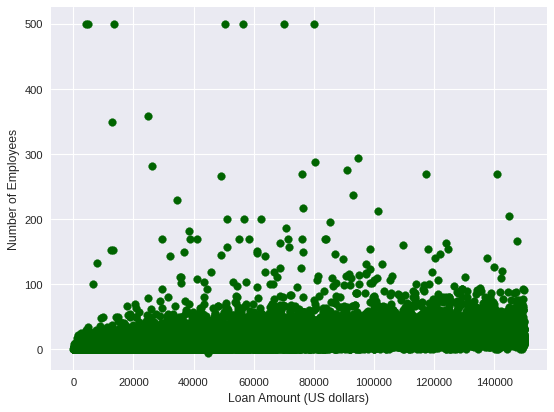

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.xlabel("Loan Amount (US dollars)")
plt.ylabel("Number of Employees")

plt.scatter(ruralSub['TOTAL_PROCEEDS'],ruralSub['JobsReported'], c="darkgreen");

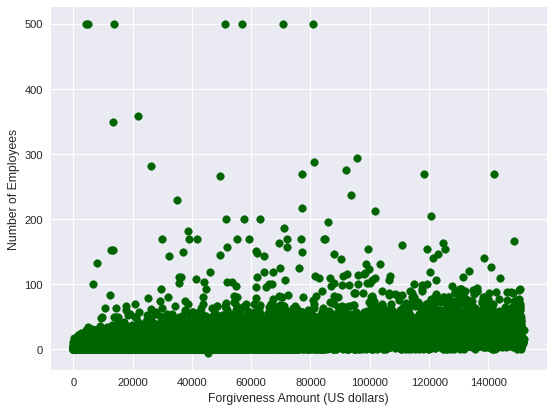

In [ ]:
figure(figsize=(8, 6), dpi=80)

plt.xlabel("Forgiveness Amount (US dollars)")
plt.ylabel("Number of Employees")
plt.scatter(ruralSub['ForgivenessAmount'],ruralSub['JobsReported'], c="darkgreen");

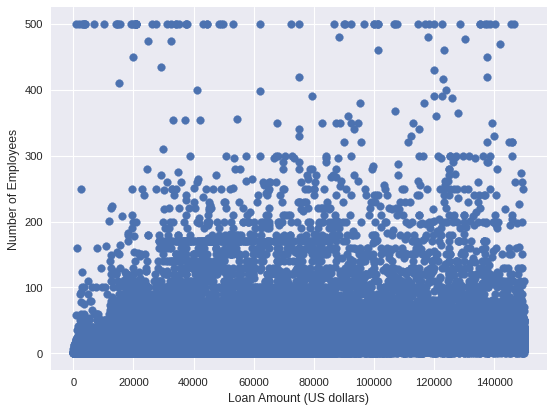

In [ ]:
figure(figsize=(8, 6), dpi=80)

plt.xlabel("Loan Amount (US dollars)")
plt.ylabel("Number of Employees")
plt.scatter(urbanSub['TOTAL_PROCEEDS'],urbanSub['JobsReported']);

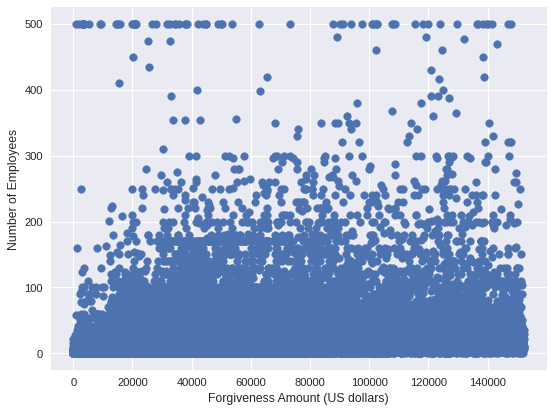

In [ ]:
figure(figsize=(8, 6), dpi=80)

plt.xlabel("Forgiveness Amount (US dollars)")
plt.ylabel("Number of Employees")
plt.scatter(urbanSub['ForgivenessAmount'],urbanSub['JobsReported']);

 ***Prediction Values (Urban Subset for businesses under)***

In [ ]:
X= urbanSub['TOTAL_PROCEEDS']
y = urbanSub['JobsReported']

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = Ridge(alpha=1.0)
r5 = linear_model.BayesianRidge()
r6 = ElasticNet(random_state=0)

X = X.values.reshape(-1,1)

r1.fit(X, y)
r2.fit(X, y)
r3.fit(X, y)
r4.fit(X, y)
r5.fit(X, y)
r6.fit(X, y)

pred1 = r1.predict(X)
pred2 = r2.predict(X)
pred3 = r3.predict(X)
pred4 = r4.predict(X)
pred5 = r5.predict(X)
pred6 = r6.predict(X)

# now let's see the R^2 score for each model-
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an  score of 0.0.

print("LinearRegression r2 score: ", r2_score(y, pred1))
print("RandomForestRegressor r2 score: ", r2_score(y, pred2))
print("KNeighborsRegressor r2 score: ", r2_score(y, pred3))
print("Ridge r2 score: ", r2_score(y, pred4))
print("Bayesian Ridge r2 score: ", r2_score(y, pred5))
print("ElasticNet r2 score: ", r2_score(y, pred6))

print(".....")

# We can also check the explained variance of each model- The best possible score is 1.0, lower values are worse.
print("LinearRegression Explained Variance: ", explained_variance_score(y, pred1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(y, pred2))
print("KNeighborsRegressor Explained Variance: ", explained_variance_score(y, pred3))
print("Ridge Explained Variance: ", explained_variance_score(y, pred4))
print("Bayesian Ridge Explained Variance: ", explained_variance_score(y, pred5))
print("ElasticNet Explained Variance: ", explained_variance_score(y, pred6))

LinearRegression r2 score:  0.1895307665430791
RandomForestRegressor r2 score:  0.3944666089185721
KNeighborsRegressor r2 score:  0.26445091320238223
Ridge r2 score:  0.18953076654307943
Bayesian Ridge r2 score:  0.18953076654307943
ElasticNet r2 score:  0.1895307665411825
.....
LinearRegression Explained Variance:  0.1895307665430791
RandomForestRegressor Explained Variance:  0.3944672839037141
KNeighborsRegressor Explained Variance:  0.26455451925633267
Ridge Explained Variance:  0.18953076654307943
Bayesian Ridge Explained Variance:  0.18953076654307943
ElasticNet Explained Variance:  0.18953076654118273


In [ ]:
X= urbanSub['ForgivenessAmount']
y = urbanSub['JobsReported']

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = Ridge(alpha=1.0)
r5 = linear_model.BayesianRidge()
r6 = ElasticNet(random_state=0)

X = X.values.reshape(-1,1)

r1.fit(X, y)
r2.fit(X, y)
r3.fit(X, y)
r4.fit(X, y)
r5.fit(X, y)
r6.fit(X, y)

pred1 = r1.predict(X)
pred2 = r2.predict(X)
pred3 = r3.predict(X)
pred4 = r4.predict(X)
pred5 = r5.predict(X)
pred6 = r6.predict(X)

# now let's see the R^2 score for each model-
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an  score of 0.0.

print("LinearRegression r2 score: ", r2_score(y, pred1))
print("RandomForestRegressor r2 score: ", r2_score(y, pred2))
print("KNeighborsRegressor r2 score: ", r2_score(y, pred3))
print("Ridge r2 score: ", r2_score(y, pred4))
print("Bayesian Ridge r2 score: ", r2_score(y, pred5))
print("ElasticNet r2 score: ", r2_score(y, pred6))

print(".....")

# We can also check the explained variance of each model- The best possible score is 1.0, lower values are worse.
print("LinearRegression Explained Variance: ", explained_variance_score(y, pred1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(y, pred2))
print("KNeighborsRegressor Explained Variance: ", explained_variance_score(y, pred3))
print("Ridge Explained Variance: ", explained_variance_score(y, pred4))
print("Bayesian Ridge Explained Variance: ", explained_variance_score(y, pred5))
print("ElasticNet Explained Variance: ", explained_variance_score(y, pred6))

LinearRegression r2 score:  0.1879228070886061
RandomForestRegressor r2 score:  0.7545942628138574
KNeighborsRegressor r2 score:  0.3563861326382287
Ridge r2 score:  0.1879228070886062
Bayesian Ridge r2 score:  0.18792280708860554
ElasticNet r2 score:  0.1879228070867207
.....
LinearRegression Explained Variance:  0.18792280708860598
RandomForestRegressor Explained Variance:  0.7545943339304089
KNeighborsRegressor Explained Variance:  0.3563862760535331
Ridge Explained Variance:  0.1879228070886061
Bayesian Ridge Explained Variance:  0.18792280708860543
ElasticNet Explained Variance:  0.1879228070867207


 ***Prediction Values (Rural Subset for businesses under)***

In [ ]:
X= ruralSub['TOTAL_PROCEEDS']
y = ruralSub['JobsReported']

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = Ridge(alpha=1.0)
r5 = linear_model.BayesianRidge()
r6 = ElasticNet(random_state=0)

X = X.values.reshape(-1,1)

r1.fit(X, y)
r2.fit(X, y)
r3.fit(X, y)
r4.fit(X, y)
r5.fit(X, y)
r6.fit(X, y)

pred1 = r1.predict(X)
pred2 = r2.predict(X)
pred3 = r3.predict(X)
pred4 = r4.predict(X)
pred5 = r5.predict(X)
pred6 = r6.predict(X)

# now let's see the R^2 score for each model-
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an  score of 0.0.

print("LinearRegression r2 score: ", r2_score(y, pred1))
print("RandomForestRegressor r2 score: ", r2_score(y, pred2))
print("KNeighborsRegressor r2 score: ", r2_score(y, pred3))
print("Ridge r2 score: ", r2_score(y, pred4))
print("Bayesian Ridge r2 score: ", r2_score(y, pred5))
print("ElasticNet r2 score: ", r2_score(y, pred6))

print(".....")

# We can also check the explained variance of each model- The best possible score is 1.0, lower values are worse.
print("LinearRegression Explained Variance: ", explained_variance_score(y, pred1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(y, pred2))
print("KNeighborsRegressor Explained Variance: ", explained_variance_score(y, pred3))
print("Ridge Explained Variance: ", explained_variance_score(y, pred4))
print("Bayesian Ridge Explained Variance: ", explained_variance_score(y, pred5))
print("ElasticNet Explained Variance: ", explained_variance_score(y, pred6))

LinearRegression r2 score:  0.3696194394113904
RandomForestRegressor r2 score:  0.6196295093124321
KNeighborsRegressor r2 score:  0.4351079830799164
Ridge r2 score:  0.36961943941139075
Bayesian Ridge r2 score:  0.3696194394113895
ElasticNet r2 score:  0.36961943940429054
.....
LinearRegression Explained Variance:  0.3696194394113904
RandomForestRegressor Explained Variance:  0.6196295222453968
KNeighborsRegressor Explained Variance:  0.4351900627063965
Ridge Explained Variance:  0.36961943941139075
Bayesian Ridge Explained Variance:  0.36961943941138964
ElasticNet Explained Variance:  0.36961943940429054


In [ ]:
X= ruralSub['ForgivenessAmount']
y = ruralSub['JobsReported']

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = Ridge(alpha=1.0)
r5 = linear_model.BayesianRidge()
r6 = ElasticNet(random_state=0)

X = X.values.reshape(-1,1)

r1.fit(X, y)
r2.fit(X, y)
r3.fit(X, y)
r4.fit(X, y)
r5.fit(X, y)
r6.fit(X, y)

pred1 = r1.predict(X)
pred2 = r2.predict(X)
pred3 = r3.predict(X)
pred4 = r4.predict(X)
pred5 = r5.predict(X)
pred6 = r6.predict(X)

# now let's see the R^2 score for each model-
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an  score of 0.0.

print("LinearRegression r2 score: ", r2_score(y, pred1))
print("RandomForestRegressor r2 score: ", r2_score(y, pred2))
print("KNeighborsRegressor r2 score: ", r2_score(y, pred3))
print("Ridge r2 score: ", r2_score(y, pred4))
print("Bayesian Ridge r2 score: ", r2_score(y, pred5))
print("ElasticNet r2 score: ", r2_score(y, pred6))

print(".....")

# We can also check the explained variance of each model- The best possible score is 1.0, lower values are worse.
print("LinearRegression Explained Variance: ", explained_variance_score(y, pred1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(y, pred2))
print("KNeighborsRegressor Explained Variance: ", explained_variance_score(y, pred3))
print("Ridge Explained Variance: ", explained_variance_score(y, pred4))
print("Bayesian Ridge Explained Variance: ", explained_variance_score(y, pred5))
print("ElasticNet Explained Variance: ", explained_variance_score(y, pred6))

LinearRegression r2 score:  0.36656408068879154
RandomForestRegressor r2 score:  0.837061238454861
KNeighborsRegressor r2 score:  0.510702861045129
Ridge r2 score:  0.3665640806887912
Bayesian Ridge r2 score:  0.36656408068879054
ElasticNet r2 score:  0.36656408068171886
.....
LinearRegression Explained Variance:  0.36656408068879154
RandomForestRegressor Explained Variance:  0.8370620446792545
KNeighborsRegressor Explained Variance:  0.5107029142543852
Ridge Explained Variance:  0.3665640806887913
Bayesian Ridge Explained Variance:  0.36656408068879065
ElasticNet Explained Variance:  0.36656408068171886


# **Business with Proceedings above $150000**